In [2]:
import scanpy as sc 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors, cm
import numpy as np
import scipy
import os

from utils import plot_histogram
from var import *

import pertpy as pt

ryp2 is not installed. Install with pip install rpy2 to run tools with R support.

In [3]:
#set seed to 0 for reproducibility of results
np.random.seed(0)

In [4]:
#Create figures folder
figures_folder = os.path.join(results_folder, 'figures/perturbed_rna_exploration/')
if not os.path.exists(figures_folder):
    os.makedirs(figures_folder)

<h3> 1. Data exploration of filtered data </h3>

In [5]:
#load log normlised adata object with filter for cells with more than 5000 UMI counts expressed
adata_preprocessed = sc.read_h5ad(f'/lustre/scratch123/hgi/teams/parts/kl11/cell2state_tf_activation/results/20230116_adata_pre_processed.h5ad')

In [6]:
#load adata obs object from crispra csv file
adata_obs_df=pd.read_csv('/lustre/scratch123/hgi/teams/parts/kl11/cell2state_tf_activation/data/crispra_data_exploration/20230202_perturbation_state.csv', index_col=0)
#order index of adata_obs_df to match adata_preprocessed
adata_obs_df = adata_obs_df.reindex(adata_preprocessed.obs.index)
#check that the index of adata_obs_df matches adata_preprocessed
assert adata_obs_df.index.equals(adata_preprocessed.obs.index)
#overwrite adata_preprocessed.obs with adata_obs_df
adata_preprocessed.obs = adata_obs_df

#filter out cells that are not in the perturbation state
adata_pertubed = adata_preprocessed[adata_preprocessed.obs['perturbation_state'] != 'not_perturbed']

#### 1.1 Cell cycle score

In [7]:
cell_cycle_genes = [x.strip() for x in open('/lustre/scratch123/hgi/teams/parts/kl11/cell2state_tf_activation/data/regev_lab_cell_cycle_genes.txt')]

In [8]:
s_genes = cell_cycle_genes[:43]
s_genes = [x for x in s_genes if adata_preprocessed.var['SYMBOL'].isin([x]).any()]
g2m_genes = cell_cycle_genes[43:]
g2m_genes = [x for x in g2m_genes if adata_preprocessed.var['SYMBOL'].isin([x]).any()]

#extract ESNG cell cycle genes from adata_preprocessed
s_genes_ENSG = adata_preprocessed[:, adata_preprocessed.var['SYMBOL'].isin(s_genes)].var_names.to_list()
g2m_genes_ENSG = adata_preprocessed[:, adata_preprocessed.var['SYMBOL'].isin(g2m_genes)].var_names.to_list()


In [9]:
#filter adatapreprocessed for genes in s_genes_ENSG and g2m_genes_ENSG
adata_cell_cycle = adata_preprocessed[:, adata_preprocessed.var_names.isin(s_genes_ENSG)]

In [10]:
sc.pp.normalize_per_cell(adata_preprocessed, counts_per_cell_after=1e4)

In [11]:
sc.tl.score_genes_cell_cycle(adata_preprocessed, s_genes=s_genes_ENSG, g2m_genes=g2m_genes_ENSG)

In [14]:
adata_preprocessed.obs

barcodes  \
cellranger710_count_05e682d5679826b9b76d6bec731...  TGGTTAGTCCCTCAGT-1   
cellranger710_count_05e682d5679826b9b76d6bec731...  GTACTTTGTCTCCATC-1   
cellranger710_count_05e682d5679826b9b76d6bec731...  ATAACGCCAGCCTTTC-1   
cellranger710_count_05e682d5679826b9b76d6bec731...  CTTGGCTCACTTACGA-1   
cellranger710_count_05e682d5679826b9b76d6bec731...  CTCGTACGTCACCCAG-1   
...                                                                ...   
cellranger710_count_05e682d5679826b9b76d6bec731...  CAACCAATCGGATGGA-1   
cellranger710_count_05e682d5679826b9b76d6bec731...  CTGCTGTTCTTCAACT-1   
cellranger710_count_05e682d5679826b9b76d6bec731...  ACCCACTGTGTTGAGG-1   
cellranger710_count_05e682d5679826b9b76d6bec731...  TGCTACCGTCCATGAT-1   
cellranger710_count_05e682d5679826b9b76d6bec731...  CTAATGGTCGTCACGG-1   

                                                    n_genes_by_counts  \
cellranger710_count_05e682d5679826b9b76d6bec731...               6246   
cellranger710_count_05e682d5679826b9b76d6bec731...               6321   
cellranger710_count_05e682d5679826b9b76d6bec731...               6198   
cellranger710_count_05e682d5679826b9b76d6bec731...               6998   
cellranger710_count_05e682d5679826b9b76d6bec731...               7931   
...                                                               ...   
cellranger710_count_05e682d5679826b9b76d6bec731...               6419   
cellranger710_count_05e682d5679826b9b76d6bec731...               7424   
cellranger710_count_05e682d5679826b9b76d6bec731...               7453   
cellranger710_count_05e682d5679826b9b76d6bec731...               6965   
cellranger710_count_05e682d5679826b9b76d6bec731...               6402   

                                                    log1p_n_genes_by_counts  \
cellranger710_count_05e682d5679826b9b76d6bec731...                 8.739857   
cellranger710_count_05e682d5679826b9b76d6bec731...                 8.751791   
cellranger710_count_05e682d5679826b9b76d6bec731...                 8.732143   
cellranger710_count_05e682d5679826b9b76d6bec731...                 8.853523   
cellranger710_count_05e682d5679826b9b76d6bec731...                 8.978660   
...                                                                     ...   
cellranger710_count_05e682d5679826b9b76d6bec731...                 8.767173   
cellranger710_count_05e682d5679826b9b76d6bec731...                 8.912608   
cellranger710_count_05e682d5679826b9b76d6bec731...                 8.916506   
cellranger710_count_05e682d5679826b9b76d6bec731...                 8.848796   
cellranger710_count_05e682d5679826b9b76d6bec731...                 8.764522   

                                                    total_counts  \
cellranger710_count_05e682d5679826b9b76d6bec731...       29366.0   
cellranger710_count_05e682d5679826b9b76d6bec731...       21840.0   
cellranger710_count_05e682d5679826b9b76d6bec731...       22869.0   
cellranger710_count_05e682d5679826b9b76d6bec731...       27115.0   
cellranger710_count_05e682d5679826b9b76d6bec731...       43849.0   
...                                                          ...   
cellranger710_count_05e682d5679826b9b76d6bec731...       28205.0   
cellranger710_count_05e682d5679826b9b76d6bec731...       28448.0   
cellranger710_count_05e682d5679826b9b76d6bec731...       36751.0   
cellranger710_count_05e682d5679826b9b76d6bec731...       27663.0   
cellranger710_count_05e682d5679826b9b76d6bec731...       25890.0   

                                                    log1p_total_counts  \
cellranger710_count_05e682d5679826b9b76d6bec731...           10.287627   
cellranger710_count_05e682d5679826b9b76d6bec731...            9.991545   
cellranger710_count_05e682d5679826b9b76d6bec731...           10.037581   
cellranger710_count_05e682d5679826b9b76d6bec731...           10.207879   
cellranger710_count_05e682d5679826b9b76d6bec731...           10.688530   
...                                                                ...   
cellranger71

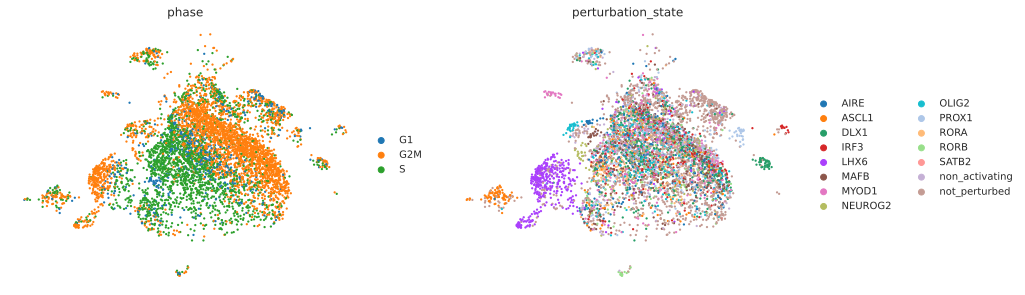

In [15]:
sc.pl.umap(adata_preprocessed, color=[ 'phase','perturbation_state'], frameon=False)

In [16]:
#regress out batch effect using scanpy
sc.pp.regress_out(adata_preprocessed, ['S_score', 'G2M_score'])
sc.pp.scale(adata_preprocessed)

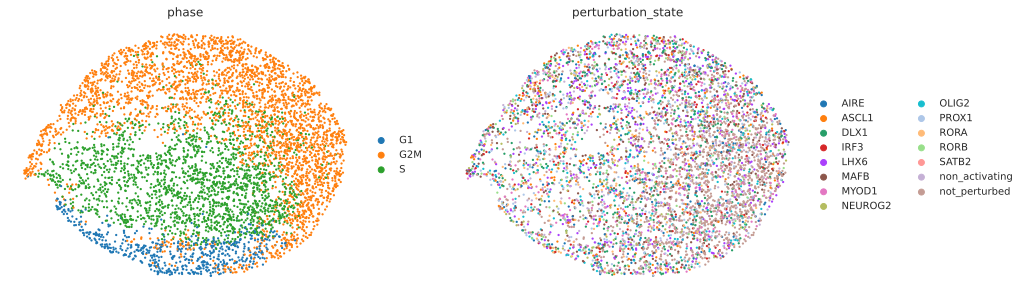

In [17]:
#compute PCA and UMAP for adata_preprocessed

sc.tl.pca(adata_preprocessed,svd_solver='arpack')
sc.pp.neighbors(adata_preprocessed, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_preprocessed)
sc.pl.umap(adata_preprocessed, color=['phase','perturbation_state'],frameon=False)

In [25]:
#assign raw counts to adata_preprocessed.X
adata_preprocessed.X = adata_preprocessed.layers['counts']
sc.pp.normalize_total(adata_preprocessed, target_sum=1e4)

#create new column perturbation in adata_preprocessed.obs for perturbed vs non perturbed cells based on perturbation_state
adata_preprocessed.obs['perturbation'] = adata_preprocessed.obs['perturbation_state'].apply(lambda x: 'perturbed' if x != 'non_activating' else 'non_activating')

In [31]:
#plot umap of cell cycle genes
ms = pt.tl.Mixscape()
ms.pert_sign(
    adata_preprocessed,
    pert_key="perturbation",
    control="non_activating",
    n_neighbors=20
)

In [32]:
adata_preprocessed.X = adata_preprocessed.layers['X_pert']

In [33]:

sc.pp.pca(adata_preprocessed, svd_solver='arpack')

In [34]:
sc.pp.neighbors(adata_preprocessed)

In [35]:
sc.tl.umap(adata_preprocessed)

[<AxesSubplot: title={'center': 'phase'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot: title={'center': 'perturbation_state'}, xlabel='UMAP1', ylabel='UMAP2'>]

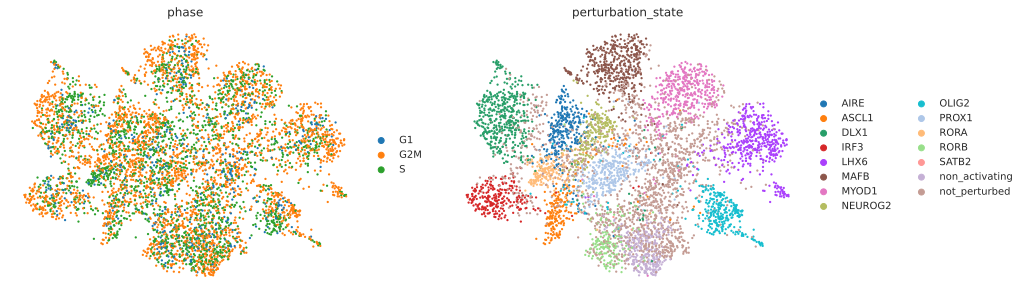

In [36]:
#plot umap of cell cycle genes
sc.pl.umap(adata_preprocessed, color=['phase','perturbation_state'], ncols=2, frameon=False, show=False)

In [38]:
adata_preprocessed.var

feature_types  \
ENSEMBL                                                                    
AIRE_ACAGCAGCGCCTCCATCACA_AIRE_CGGAGACTTCCCGAGA...  CRISPR Guide Capture   
AIRE_ACAGCAGCGCCTCCATCACA_AIRE_CGGAGACTTCCCGAGA...  CRISPR Guide Capture   
AIRE_ATCACAGGGAAGTGTCCCTG_AIRE_CAGGGAAGTGTCCCTG...  CRISPR Guide Capture   
AIRE_ATCACAGGGAAGTGTCCCTG_AIRE_CAGGGAAGTGTCCCTG...  CRISPR Guide Capture   
ASCL1_AGCCGCTCGCTGCAGCAGCG_ASCL1_GGAGGGGGAGTTTA...  CRISPR Guide Capture   
...                                                                  ...   
TSHZ3_AGTTTGACAAATCGCTCCAG_TSHZ3_TTCCCATTCCGCCG...  CRISPR Guide Capture   
TSHZ3_CAAATCGCTCCAGAGGCCAG_TSHZ3_GAGGAGGACCGCGC...  CRISPR Guide Capture   
TSHZ3_CAAATCGCTCCAGAGGCCAG_TSHZ3_GAGGAGGACCGCGC...  CRISPR Guide Capture   
sgRNA1_SCP_CGAGTGTTCGATCGCGACTG_sgRNA1_SCP_CGAG...  CRISPR Guide Capture   
sgRNA6_SCP_GCAGACGTGCCTACGGACCG_sgRNA6_SCP_GCAG...  CRISPR Guide Capture   

                                                    genome  \
ENSEMBL                                                      
AIRE_ACAGCAGCGCCTCCATCACA_AIRE_CGGAGACTTCCCGAGA...  GRCh38   
AIRE_ACAGCAGCGCCTCCATCACA_AIRE_CGGAGACTTCCCGAGA...  GRCh38   
AIRE_ATCACAGGGAAGTGTCCCTG_AIRE_CAGGGAAGTGTCCCTG...  GRCh38   
AIRE_ATCACAGGGAAGTGTCCCTG_AIRE_CAGGGAAGTGTCCCTG...  GRCh38   
ASCL1_AGCCGCTCGCTGCAGCAGCG_ASCL1_GGAGGGGGAGTTTA...  GRCh38   
...                                                    ...   
TSHZ3_AGTTTGACAAATCGCTCCAG_TSHZ3_TTCCCATTCCGCCG...  GRCh38   
TSHZ3_CAAATCGCTCCAGAGGCCAG_TSHZ3_GAGGAGGACCGCGC...  GRCh38   
TSHZ3_CAAATCGCTCCAGAGGCCAG_TSHZ3_GAGGAGGACCGCGC...  GRCh38   
sgRNA1_SCP_CGAGTGTTCGATCGCGACTG_sgRNA1_SCP_CGAG...  GRCh38   
sgRNA6_SCP_GCAGACGTGCCTACGGACCG_sgRNA6_SCP_GCAG...  GRCh38   

                                                                                               SYMBOL  \
ENSEMBL                                                                                                 
AIRE_ACAGCAGCGCCTCCATCACA_AIRE_CGGAGACTTCCCGAGA...  AIRE_ACAGCAGCGCCTCCATCACA_AIRE_CGGAGACTTCCCGAG...   
AIRE_ACAGCAGCGCCTCCATCACA_AIRE_CGGAGACTTCCCGAGA...  AIRE_ACAGCAGCGCCTCCATCACA_AIRE_CGGAGACTTCCCGAG...   
AIRE_ATCACAGGGAAGTGTCCCTG_AIRE_CAGGGAAGTGTCCCTG...  AIRE_ATCACAGGGAAGTGTCCCTG_AIRE_CAGGGAAGTGTCCCT...   
AIRE_ATCACAGGGAAGTGTCCCTG_AIRE_CAGGGAAGTGTCCCTG...  AIRE_ATCACAGGGAAGTGTCCCTG_AIRE_CAGGGAAGTGTCCCT...   
ASCL1_AGCCGCTCGCTGCAGCAGCG_ASCL1_GGAGGGGGAGTTTA...  ASCL1_AGCCGCTCGCTGCAGCAGCG_ASCL1_GGAGGGGGAGTTT...   
...                                                                                               ...   
TSHZ3_AGTTTGACAAATCGCTCCAG_TSHZ3_TTCCCATTCCGCCG...  TSHZ3_AGTTTGACAAATCGCTCCAG_TSHZ3_TTCCCATTCCGCC...   
TSHZ3_CAAATCGCTCCAGAGGCCAG_TSHZ3_GAGGAGGACCGCGC...  TSHZ3_CAAATCGCTCCAGAGGCCAG_TSHZ3_GAGGAGGACCGCG...   
TSHZ3_CAAATCGCTCCAGAGGCCAG_TSHZ3_GAGGAGGACCGCGC...  TSHZ3_CAAATCGCTCCAGAGGCCAG_TSHZ3_GAGGAGGACCGCG...   
sgRNA1_SCP_CGAGTGTTCGATCGCGACTG_sgRNA1_SCP_CGAG...  sgRNA1_SCP_CGAGTGTTCGATCGCGACTG_sgRNA1_SCP_CGA...   
sgRNA6_SCP_GCAGACGTGCCTACGGACCG_sgRNA6_SCP_GCAG...  sgRNA6_SCP_GCAGACGTGCCTACGGACCG_sgRNA6_SCP_GCA...   

                                                    n_cells_by_counts  \
ENSEMBL                                                                 
AIRE_ACAGCAGCGCCTCCATCACA_AIRE_CGGAGACTTCCCGAGA...               4112   
AIRE_ACAGCAGCGCCTCCATCACA_AIRE_CGGAGACTTCCCGAGA...                 77   
AIRE_ATCACAGGGAAGTGTCCCTG_AIRE_CAGGGAAGTGTCCCTG...               1777   
AIRE_ATCACAGGGAAGTGTCCCTG_AIRE_CAGGGAAGTGTCCCTG...               2281   
ASCL1_AGCCGCTCGCTGCAGCAGCG_ASCL1_GGAGGGGGAGTTTA...               3841   
...                                                               ...   
TSHZ3_AGTTTGACAAATCGCTCCAG_TSHZ3_TTCCCATTCCGCCG...                  0   
TSHZ3_CAAATCGCTCCAGAGGCCAG_TSHZ3_GAGGAGGACCGCGC...                  0   
TSHZ3_CAAATCGCTCCAGAGGCCAG_TSHZ3_GAGGAGGACCGCGC...                  3   
sgRNA1_SCP_CGAGTGTTCGATCGCGACTG_sgRNA1_SCP_CGAG...               8299   
sgRNA6_SCP_GCAGACGTGC

<AxesSubplot: title={'center': 'MKI67'}, xlabel='UMAP1', ylabel='UMAP2'>

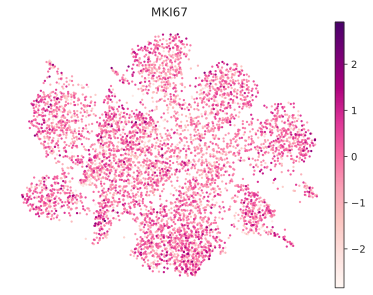

In [46]:
#plot umap of cell cycle genes
sc.pl.umap(adata_preprocessed, color=['MKI67'], ncols=2, frameon=False, show=False, gene_symbols="SYMBOL", cmap="RdPu")

/nfs/team205/kl11/miniconda3/envs/bcftools/lib/python3.9/site-packages/scanpy/tools/_leiden.py:158: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_added] = pd.Categorical(
/nfs/team205/kl11/miniconda3/envs/bcftools/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<AxesSubplot: title={'center': 'leiden'}, xlabel='UMAP1', ylabel='UMAP2'>

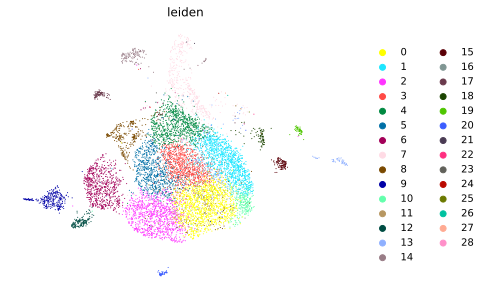

In [ ]:
# Leiden clustering with resolution 2
sc.tl.leiden(adata_pertubed, resolution=1)
# Plot UMAP
sc.pl.umap(adata_pertubed, color=['leiden'],
           color_map = 'RdPu', ncols = 3, #legend_loc='on data',
           size=5,
           legend_fontsize=10,
           frameon=False,
           show=False
           )
# plt.savefig(f'{figures_folder}{today}_perturbed_leiden_res_1.pdf')